In [5]:
# ------------- import external libs  ----------------- #
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from memory_profiler import profile
import psutil
import os
import tracemalloc
import torch
from IPython.display import Image, display
# ------------- import user libs  --------------------- #
# import bay_matting_fun as bm
import bay_matting_fun_optimized as bm
import bay_matting_un_fun as un


In [6]:
# ------------- file path define  --------------------- #

# low
# # general
#image_path = 'Dataset/input_training_lowres/GT01.png'
# # evaluation
#alpha_map_ground_truth_path = 'Dataset/gt_training_lowres/GT01.png'

# high
# general
#image_path = 'Dataset/input_training_highres/GT03.png'
# evaluation
#alpha_map_ground_truth_path = 'Dataset/gt_training_highres/GT03.png'

# custom img
image_path = 'tan.jpg'


# constant
trimap_path = 'alpha_map.png' # constant don't modify
alpha_map_path = 'AlphaMap.png'
saved_alpha_map_path = 'alpha_map.png'



(3024, 4032)


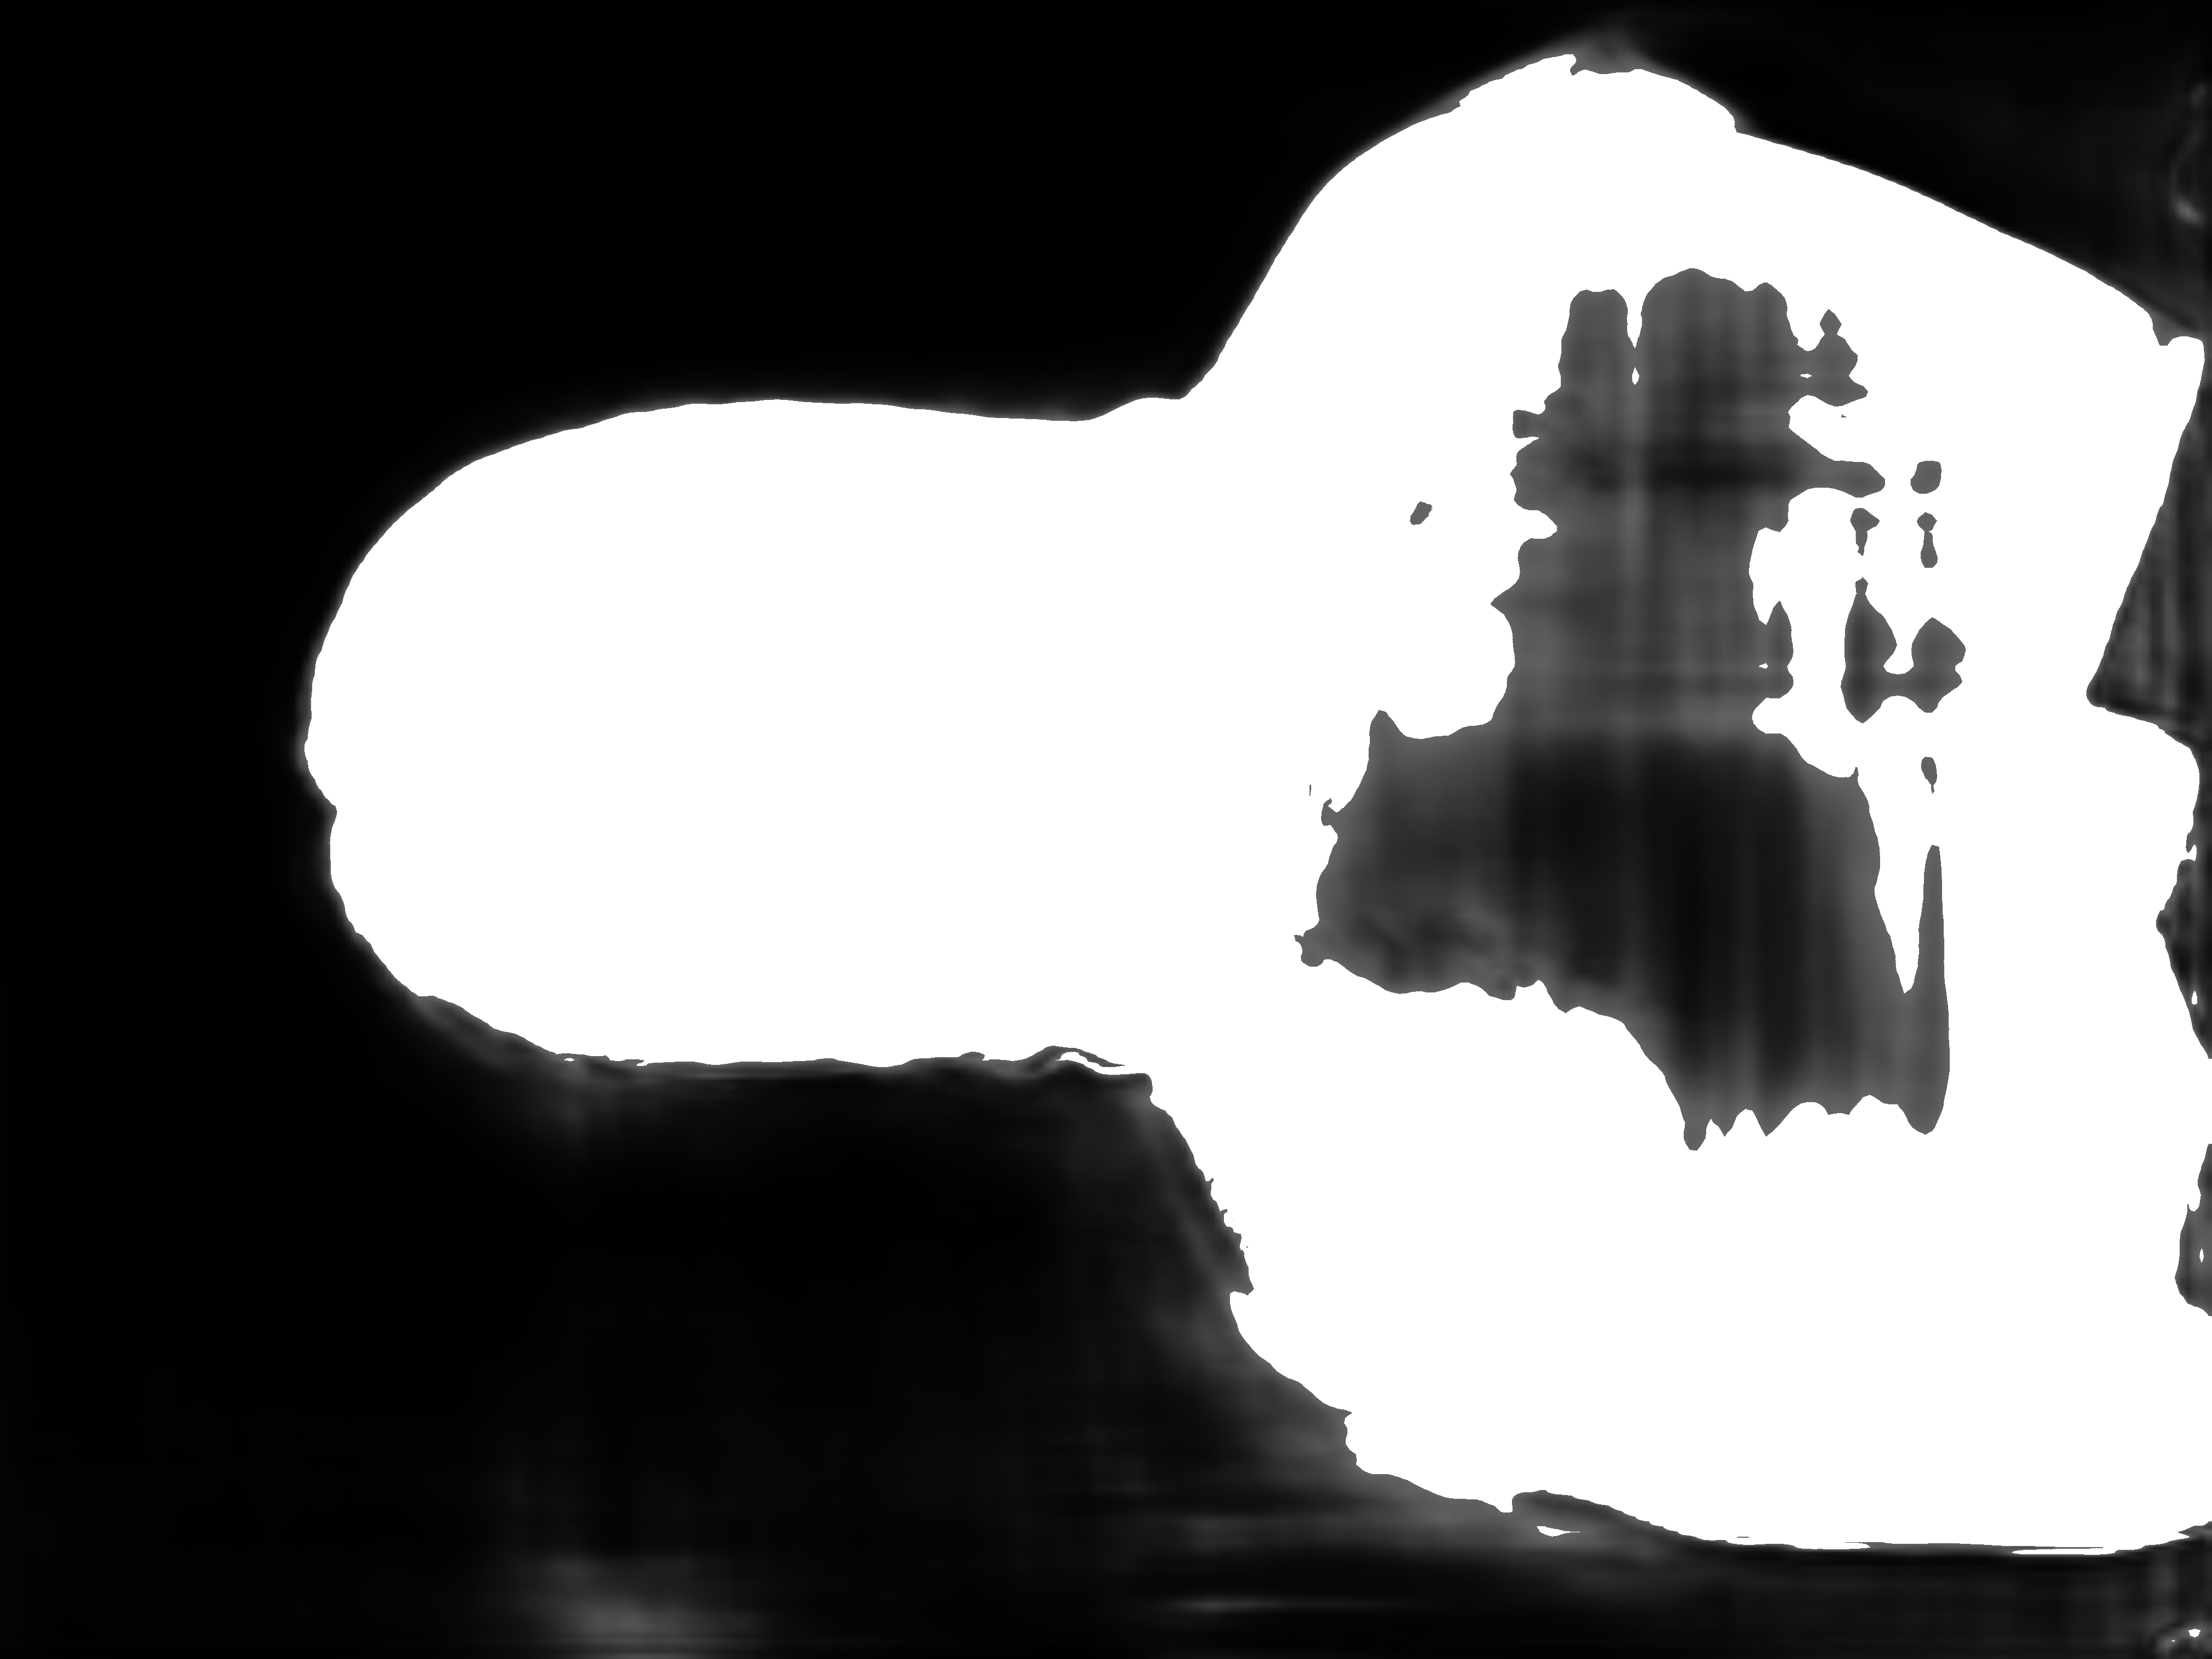

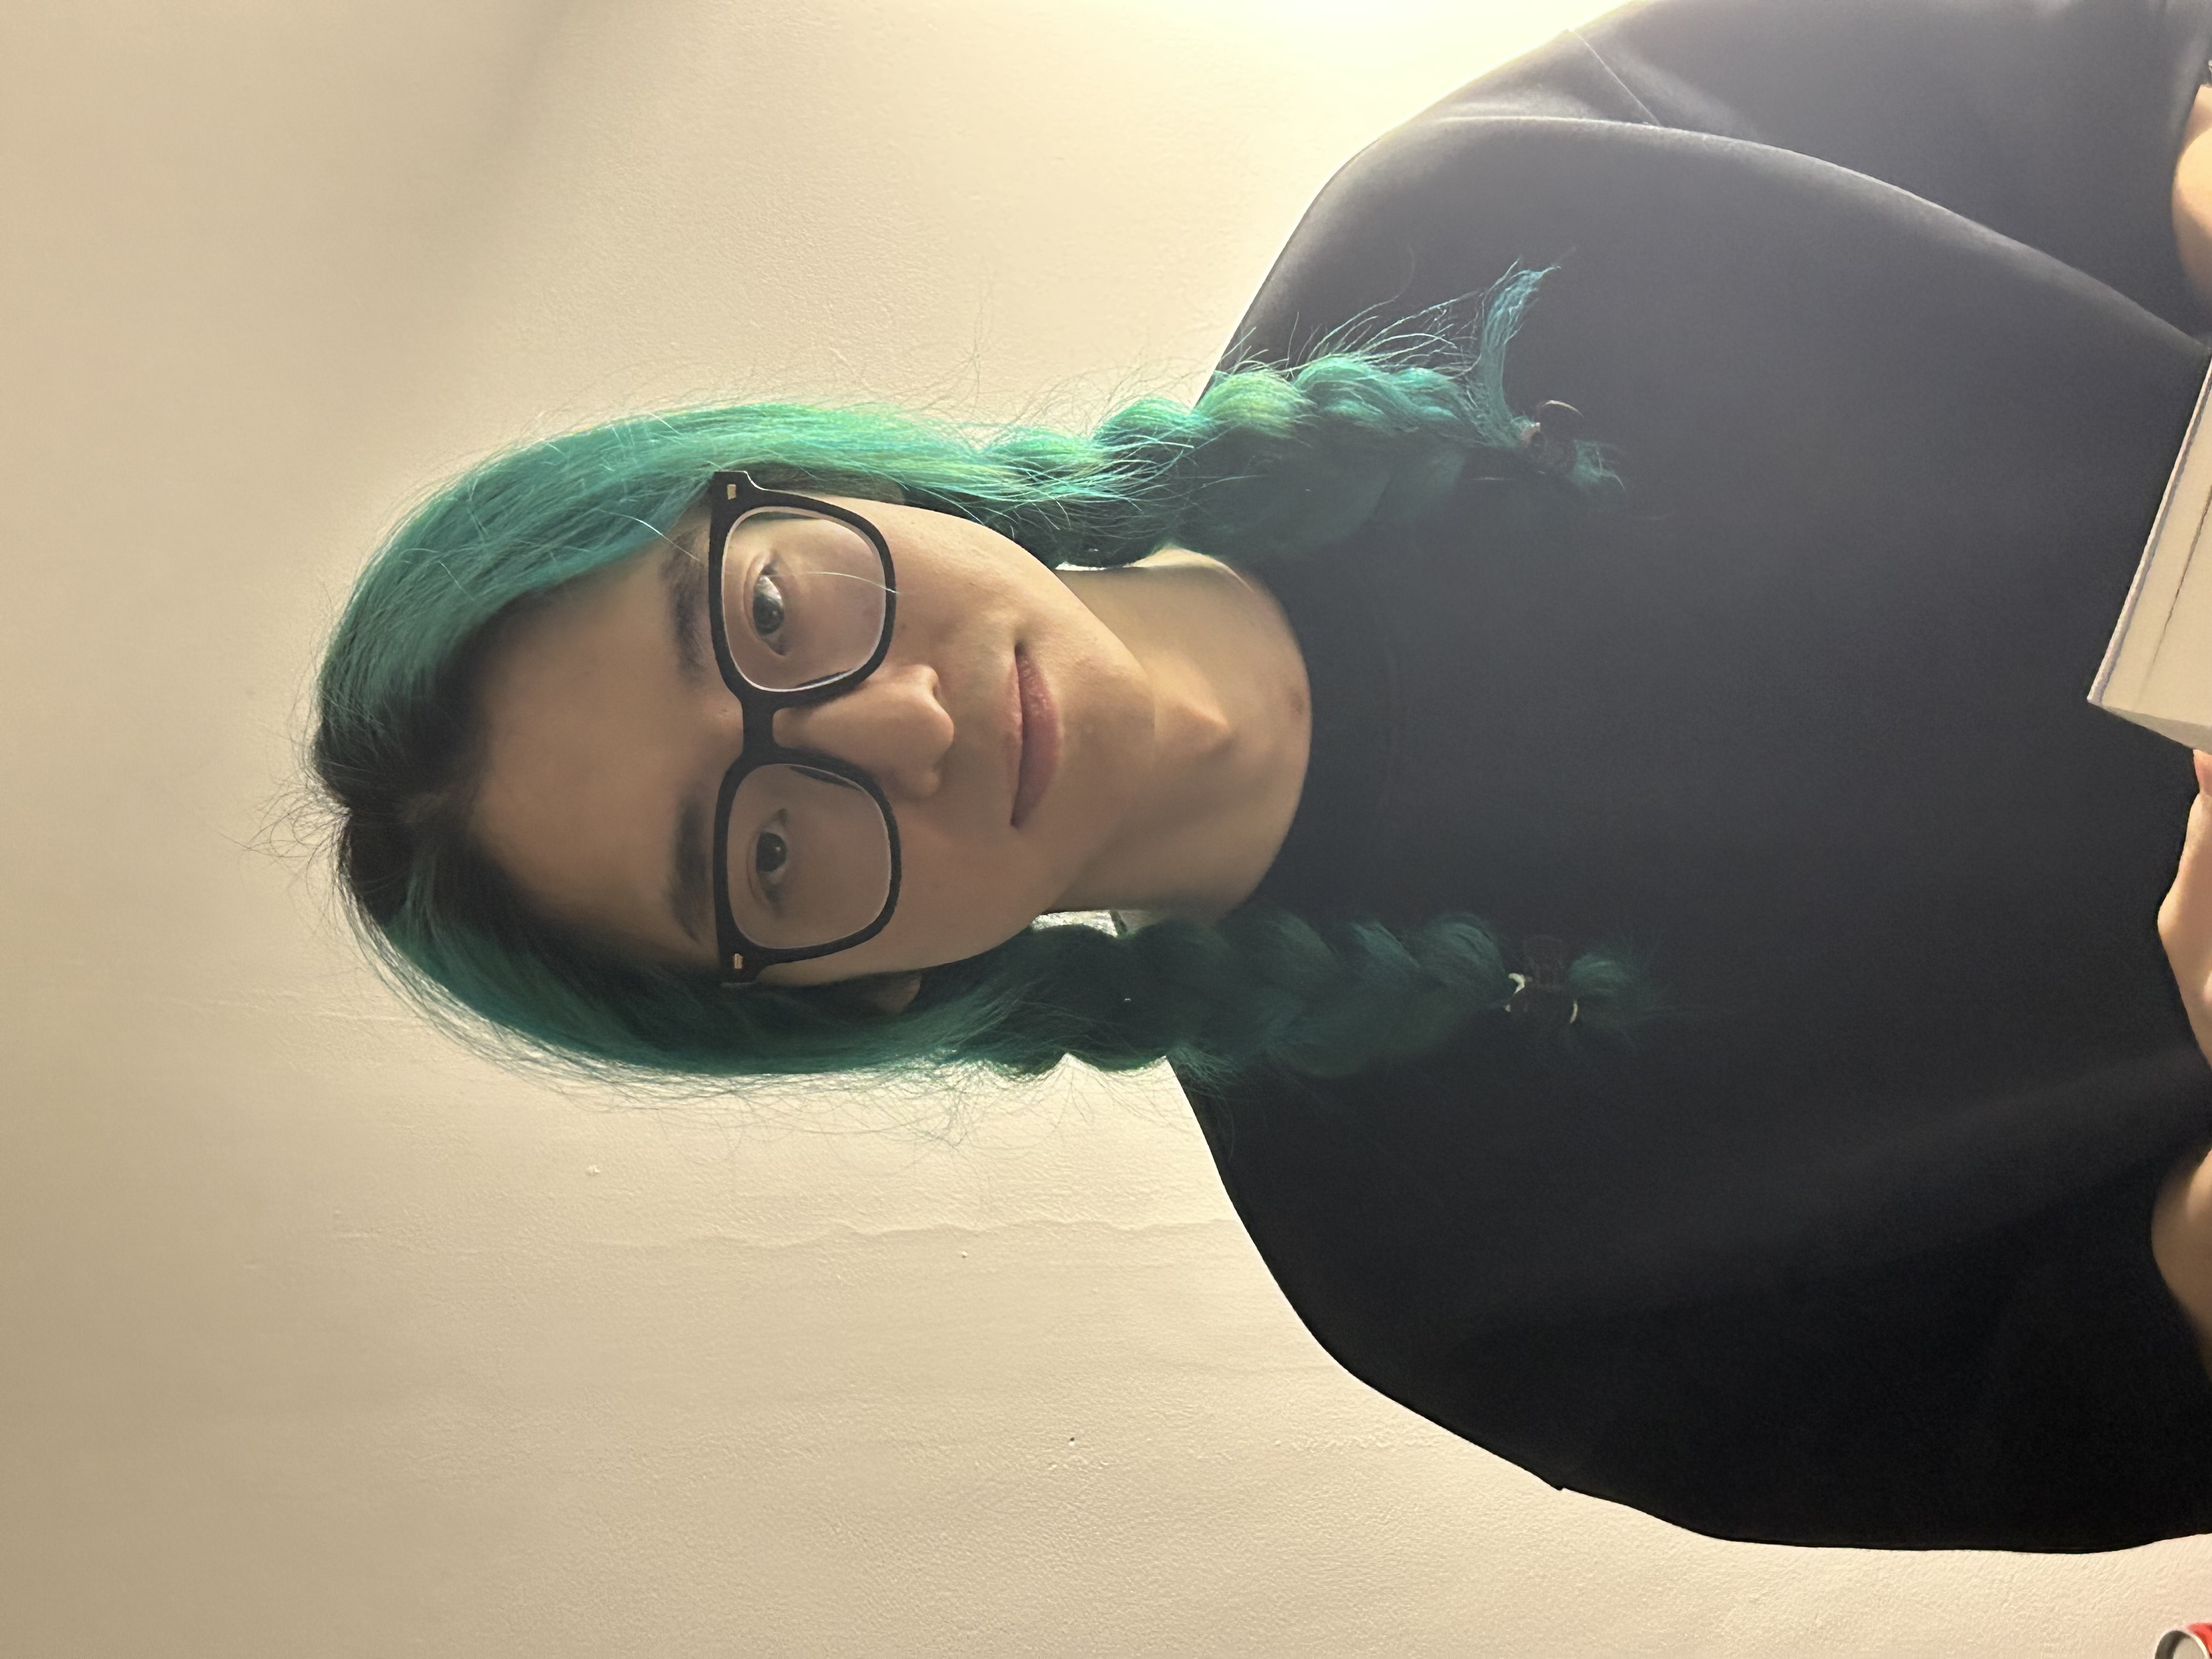

In [7]:
# generate trimap with nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alpha_map = un.inference_and_get_alphamap(image_path, device)

print(alpha_map.shape)

#alpha_map = np.where(alpha_map < 10, 0, alpha_map)
alpha_map = np.where(alpha_map > 100, 255, alpha_map)

un.save_alpha_map(alpha_map, saved_alpha_map_path)  
display(Image(filename=saved_alpha_map_path))
display(Image(filename=image_path))

0it [00:00, ?it/s]


Total memory usage: 959219550 bytes
Elapsed time: 151.12764596939087 seconds
Alpha Map saved to: AlphaMap.png


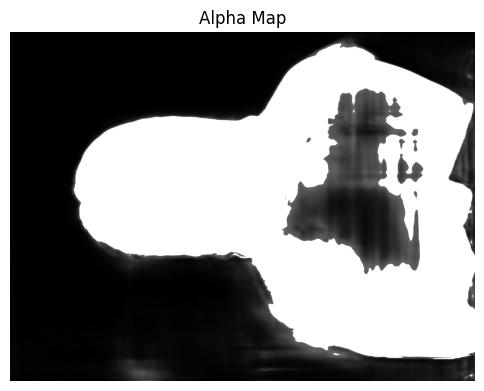

In [8]:
# ------------- complexity estimation begin ----------- #
tracemalloc.start()
start_time = time.time()
# ------------- estimate function begin --------------- #
AlphaMap = bm.bayesian_matting(image_path, trimap_path, oriVar=8, Iteration=4)
# ------------- estimate function  end  --------------- #
# calculate memory consumption
snapshot = tracemalloc.take_snapshot()
stats = snapshot.statistics('lineno')
total_memory = sum(stat.size for stat in stats)
print(f"Total memory usage: {total_memory} bytes")
tracemalloc.stop()
# calculate time consumption
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
# ------------- complexity estimation end ------------- #


# save alpha map output

cv2.imwrite(alpha_map_path, AlphaMap)
print("Alpha Map saved to:", alpha_map_path)

# display alpha map
plt.figure(figsize=(6, 6))
plt.imshow(AlphaMap, cmap='gray')
plt.title("Alpha Map")
plt.axis('off')
plt.show()

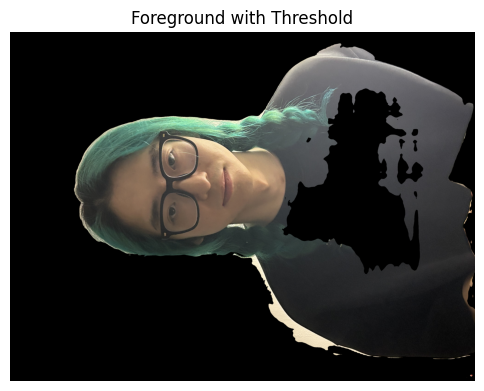

Total memory usage: 37291943 bytes
Elapsed time: 0.845930814743042 seconds


In [11]:
# ------------- complexity estimation begin ----------- #
tracemalloc.start()
start_time = time.time()
# ------------- estimate function begin --------------- #
bm.show_foreground_with_threshold(image_path, trimap_path, threshold=0.96)
# ------------- estimate function  end  --------------- #
# calculate memory consumption
snapshot = tracemalloc.take_snapshot()
stats = snapshot.statistics('lineno')
total_memory = sum(stat.size for stat in stats)
print(f"Total memory usage: {total_memory} bytes")
tracemalloc.stop()
# calculate time consumption
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")
# ------------- complexity estimation end ------------- #

In [10]:
# accuracy estimation
# MSE estimation

# Calculate MSE
mse_value = bm.calculate_alpha_mse(alpha_map_path, alpha_map_ground_truth_path)
print("Mean Squared Error (MSE):", mse_value)


NameError: name 'alpha_map_ground_truth_path' is not defined

In [ ]:
# PSNR estimation

# Calculate PSNR
psnr_value = bm.calculate_psnr(alpha_map_path, alpha_map_ground_truth_path)
print("PSNR:", psnr_value)

PSNR: 18.51958472954083
